In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Read in historical data

In [84]:
data = pd.read_excel(r"data/data.xlsx", sheet_name="Historical_series")
data.set_index("Date", inplace=True)

## Clean the data a little

<Axes: xlabel='Date'>

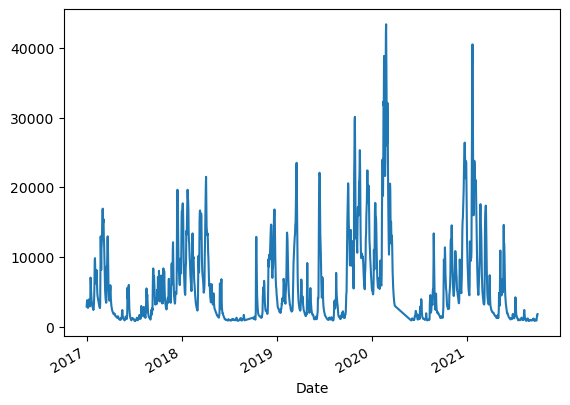

In [97]:
data.Flow.plot()

<Axes: xlabel='Date'>

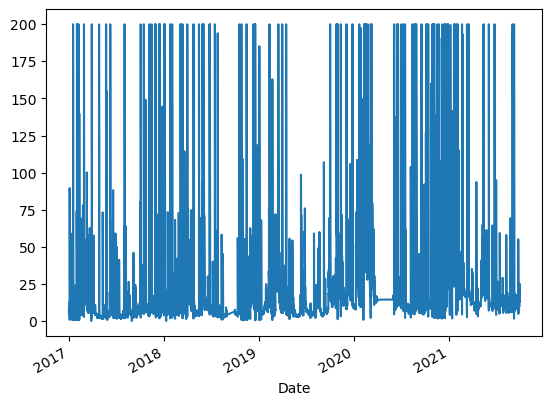

In [98]:
data.Quality.plot()

In [101]:
mask = data["Quality"] == 200
data = data[~mask]

<Axes: xlabel='Date'>

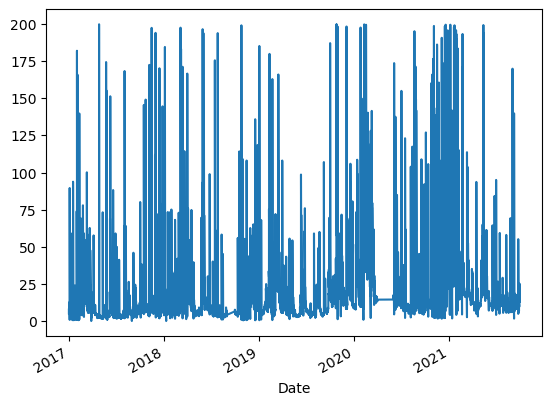

In [104]:
data.Quality.plot()

In [105]:
data_hist = data.copy()

## Create random data from historical with the same distribution

### Make data normal (suspected log-normal now)

Take the log of the data to make it fit a 'normal' distribution

In [106]:
data_hist = np.log(data_hist)

In [107]:
mean_wq = data_hist["Quality"].mean()
mean_flow = data_hist["Flow"].mean()

In [108]:
cov = data_hist.cov().to_numpy()

In [109]:
pts = np.random.multivariate_normal([mean_wq, mean_flow], cov, size=10000)
pts = pd.DataFrame(pts, columns=["Quality", "Flow"])

### Transform to log distribution

In [110]:
pts = np.exp(pts)

In [111]:
data_hist = np.exp(data_hist)

## Visualise

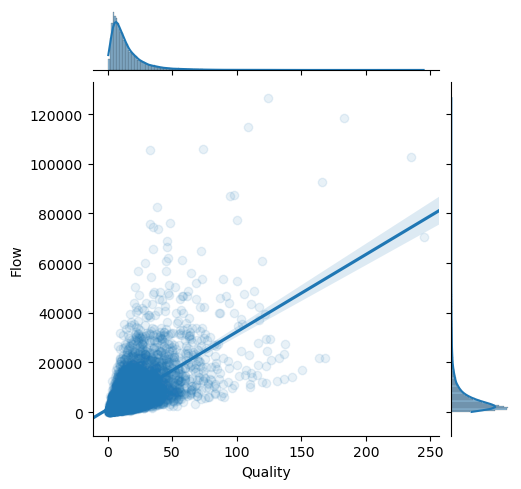

In [112]:
g = sns.jointplot(
    x="Quality",
    y="Flow",
    data=pts,
    kind="reg",
    truncate=False,
    height=5,
    scatter_kws={"alpha": 0.1},
)

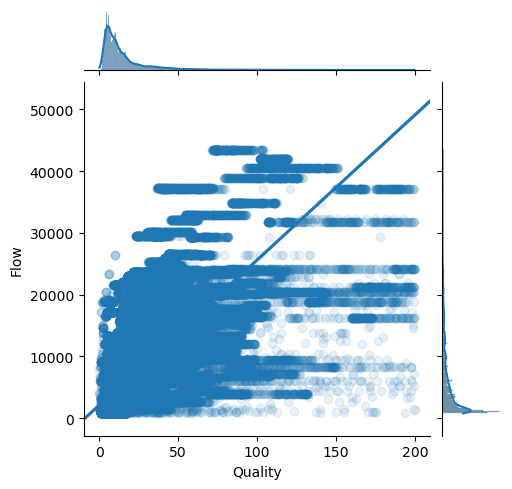

In [113]:
g = sns.jointplot(
    x="Quality",
    y="Flow",
    data=data_hist,
    kind="reg",
    truncate=False,
    height=5,
    scatter_kws={"alpha": 0.1},
)

In [114]:
print(
    data_hist["Quality"].mean(),
    data_hist["Quality"].std(),
    data_hist["Flow"].mean(),
    data_hist["Flow"].std(),
    data_hist.corr().iloc[0, 1],
)

15.633860279915613 18.193080355931354 5832.000890208046 6160.591925825109 0.69267285663734


In [115]:
print(
    pts["Quality"].mean(),
    pts["Quality"].std(),
    pts["Flow"].mean(),
    pts["Flow"].std(),
    pts.corr().iloc[0, 1]
)

14.868374500234161 15.103792338689344 5791.502627141347 7426.782152690053 0.6333989000859324
